In [247]:
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib as mpb
import matplotlib.pyplot as plt
import matplotlib as mpl
import autograd.numpy as np
from autograd import grad, jacobian
import matplotlib.pyplot as plt
#import matplotlib as mpl

def reverse_colourmap(cmap, name = 'my_cmap_r'):
    """
    In: 
    cmap, name 
    Out:
    my_cmap_r

    Explanation:
    t[0] goes from 0 to 1
    row i:   x  y0  y1 -> t[0] t[1] t[2]
                   /
                  /
    row i+1: x  y0  y1 -> t[n] t[1] t[2]

    so the inverse should do the same:
    row i+1: x  y1  y0 -> 1-t[0] t[2] t[1]
                   /
                  /
    row i:   x  y1  y0 -> 1-t[n] t[2] t[1]
    """        
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

In [178]:

''' INPUT: functions'''
def f1(x):
    x1, x2 = x
    return -((0.3*x1**2 + x2)**2 + (0.5*x2**2 + x1)**2) * np.exp(-0.01*(x1**2 + x2**2))

def f2(x):
    x1, x2 = x
    return ((0.3*x1**2 + x2)**2 + (0.5*x2**2 + x1)**2) * np.exp(-0.01*(x1**2 + x2**2))

Df1 = grad(f1)
Df2 = grad(f2)

def D1f1(x):
    x1,x2=x
    a=-np.exp(-0.01*(x1**2 + x2**2))*(1.2*x1*(0.3*x1**2 + x2) + 2*(x1 + 0.5*x2**2))
    b=0.02*x1*np.exp(-0.01*(x1**2 + x2**2))*((0.3*x1**2 + x2)**2 + (x1 + 0.5*x2**2)**2)
    return  Df1(x)[0] #a+b
 

def D2f1(x):
    x1,x2=x
    a= np.exp(-0.01*(x1**2 + x2**2))*(2*(0.3*x1**2 + x2) + 2*x2*(x1 + 0.5*x2**2))
    b=-0.02*x2*np.exp(-0.01*(x1**2 + x2**2))*((0.3*x1**2 + x2)**2 + (x1 + 0.5*x2**2)**2)
    return  Df1(x)[1] #-(a+b)

def D1f2(x):
    return -D1f1(x) #Df2(x)[0]

def D2f2(x):
    x1,x2=x
    a= np.exp(-0.01*(x1**2 + x2**2))*(2*(0.3*x1**2 + x2) + 2*x2*(x1 + 0.5*x2**2))
    b=-0.02*x2*np.exp(-0.01*(x1**2 + x2**2))*((0.3*x1**2 + x2)**2 + (x1 + 0.5*x2**2)**2)
    return a+b #Df2(x)[1]

def omega(x):
    return np.hstack([D1f1(x), D2f2(x)])

def fs(x):
    return np.hstack([f1(x),f2(x)])


Domega = jacobian(omega)
H = jacobian(fs)

def Dw22(z):
    x,y=z
    et=np.exp(-0.01*(x**2 + y**2))
    #a=-np.exp(-0.01*(x**2 + y**2))*(2 + 0.72*x**2 + 1.2*(0.3*x**2 + y))
    #b=0.04*np.exp(-0.01*(x**2 + y**2))*x*(1.2*x*(0.3*x**2 + y) + 2*(x + 0.5*y**2))
    #c=0.02*np.exp(-0.01*(x**2 + y**2))*((0.3*x**2 + y)**2 + (x + 0.5*y**2)**2)
    #d=0.0004*np.exp(-0.01*(x**2 + y**2))*x**2*((0.3*x**2 + y)**2 + (x + 0.5*y**2)**2)
    a=(2. + 2.9*y**2 - 0.0446*y**4 + 0.0001*y**6 + x**4*(-0.0018 + 0.000036*y**2))
    b=x**2*(-0.02 - 0.036*y + 0.0004*y**2 + 0.00024*y**3)  
    c=x*(2. - 0.1*y**2 + 0.0004*y**4)
    return et*(a+b+c)

def Dw21(z):
    x,y=z
    et=np.exp(-0.01*(x**2 + y**2))
    a=2.*y + 0.000036*x**5*y - 0.02*y**3  
    b=x**3*(-0.012 - 0.0068*y + 0.00024*y**2) + x**2*(-0.04*y + 0.0004*y**3)
    c= x*(1.2 - 0.08*y - 0.024*y**2 - 0.0196*y**3 + 0.0001*y**5)
    return et*(a+b+c)

def getJo(x):
    Jo=np.zeros((2,2))
    Jo[0,1]=np.copy(Domega(x)[0,1])
    Jo[1,0]=np.copy(Domega(x)[1,0])
    return Jo

def omega_s(x):
    W=Domega(x)
    Df1_=Df1(x) 
    Df2_ =Df2(x) 
    return np.hstack([Df1_[0]-W[1,0]*(1/W[1,1])*Df1_[1], Df2_[0]])
                      #Dw21(x)*(1/Dw22(x))*D2f1(x), D2f2(x)])

In [412]:
a1=0.15; b1=0.25
def f1(x):
    x1,x2=x
    return  -((a1*x1**2 + x2)**2 + (b1*x2**2 + x1)**2) * np.exp(-0.01*(x1**2 + x2**2))
def w(x):
    x1,x2=x
    et=np.exp(-0.01*(x1**2 + x2**2))
    d1=et*(-4*a1*x1*(a1*x1**2+x2)-2*(x1+b1*x2**2)+0.02*x1*((a1*x1**2+x2)**2+(x1+b1*x2**2)**2))
    d2=et*(2*(a1*x1**2+x2)+4*b1*x2*(x1+b1*x2**2)-0.02*x2*((a1*x1**2+x2)**2+(x1+b1*x2**2)**2))
    return np.hstack([d1,d2])

def ws(x):
    x1,x2=x
    et=np.exp(-0.01*(x1**2 + x2**2))
    d1=et*(-4*a1*x1*(a1*x1**2+x2)-2*(x1+b1*x2**2)+0.02*x1*((a1*x1**2+x2)**2+(x1+b1*x2**2)**2))
    d2=et*(2*(a1*x1**2+x2)+4*b1*x2*(x1+b1*x2**2)-0.02*x2*((a1*x1**2+x2)**2+(x1+b1*x2**2)**2))
    d22_1=et*((2-0.1*x2**2+0.0004*x2**4)+a1**2*x1**4*(-0.02 + 0.0004*x2**2))
    d22_2=et*(x1**2*(-0.02 - 0.12*a1*x2 + 0.0004*x2**2 + 0.0008*a1*x2**3))
    d22_3=et*(b1*x1*(4. - 0.2*x2**2 +0.0008*x2**4) + b1**2*(12.*x2**2 - 0.18*x2**4 + 0.0004*x2**6))
    d22=d22_1+d22_2+d22_3
    d21_1=et*(a1**2*x1**3*(-0.08 + 0.0004*x1**2)*x2+a1*x1*(4.-0.08*x2**2 + x1**2*(-0.04+0.0008*x2**2)))
    d21_2=et*(x2*(b1**2*x1*x2**2*(-0.08+0.0004*x2**2) + x1*(-0.08 + 0.0004*x1**2 + 0.0004*x2**2)))
    d21_3=et*(b1*(4. - 0.04*x2**2 + x1**2*(-0.08 + 0.0008*x2**2)))
    d21=d21_1+d21_2+d21_3
    d1_2=-d2*(1/d22)*d21
    #print(d1)
    #print(d1_2)
    #print(d22)
    #print(d21)
    return np.hstack([d1-d1_2,d2])

In [441]:
LOLA=False

''' INPUT: initial conditions '''
_x0s = [ [3,3], #[-1,4],
       [-3,1],
       [-10,10],
        [10,-10],
        [-10,-10], [-4,-6], [-8,12]]


x0s = np.array(_x0s, dtype=float)
num_iter = 10000
lrate1 = 0.0025
lrate2 = 2.5e-5
g1=2.5e-4
g2=2.5e-2
x_sgrad   = np.zeros((len(x0s), num_iter, 2))
x_sgrad_  = np.zeros((len(x0s), num_iter, 2))
x_stack   = np.zeros((len(x0s), num_iter, 2))

I=np.eye(2)
Jo=np.zeros((2,2))
J=np.zeros((2,2))
# Run sim

Dw2s=[]; ws_=[]
for i, x0 in enumerate(x0s):
    x_sgrad[i,0] = x0
    x_sgrad_[i,0] = x0
    x_stack[i,0] = x0
    Dw2s.append([])
    ws_.append([])
    for t in range(num_iter - 1):
        x_sgrad[i,t+1]  = x_sgrad[i,t] - lrate1*w(x_sgrad[i,t])
        #x_sgrad_[i,t+1]  = x_sgrad_[i,t] - lrate2*omega(x_sgrad_[i,t])
        x_stack[i,t+1]  = x_stack[i,t] - np.array([[g1, 0],[0,g2]])@ws(x_stack[i,t])
        #Dw2s[i].append(Dw22(x_stack[i,t]))
        ws_[i].append(ws(x_stack[i,t]))
        #if abs(Domega(x_stack[i,t])[1,1])<1e-4:
        #    print(Domega(x_stack[i,t])[1,1])


In [442]:
if 0:
    plt.close('all') 
    plt.plot(Dw2s[1])
    plt.figure()
    plt.plot(ws[1])

[12.18856815 -5.42315781]
[-2.50996629 -2.34911199]
[-10.4166233    8.48054885]
[12.18857548 -5.42316754]
[-13.32275667  -9.97459289]
[-2.53238186 -2.37348271]
[-10.41662329   8.48054885]


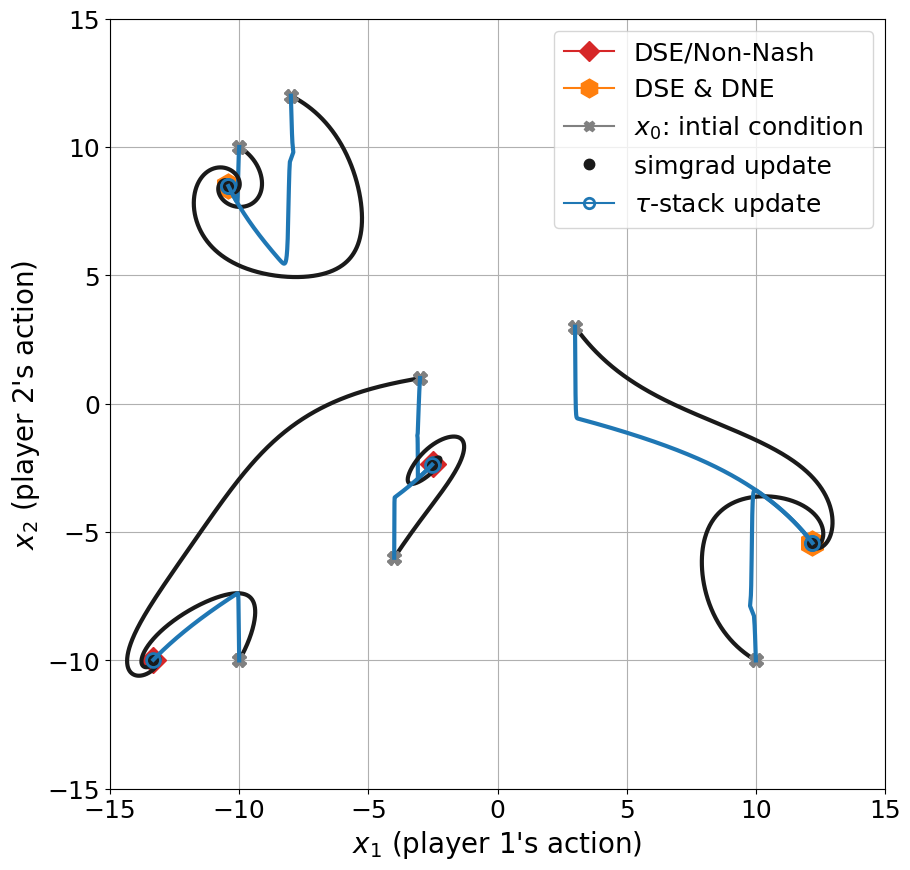

In [444]:
# Plot
mpl.rcParams.update(mpl.rcParamsDefault)
lw=3; ms=10
plt.figure(figsize=(10,10))
plt.plot(*np.array([-2.50151,-2.33986]).T, 'tab:red', marker='D', markersize=13, label='DSE/Non-Nash')
plt.plot(*np.array([-13.3392,-9.9917]).T, 'tab:red', marker='D', markersize=13) 
#, label='Stackelberg/Non-Nash')


plt.plot(*np.array([12.1886,-5.42317]).T, 'tab:orange', marker='h', 
         markersize=18, label=r'DSE & DNE')
plt.plot(*np.array([-10.4166,8.48055]).T, 'tab:orange', marker='h',markersize=18)


i=0
for x,y in zip(x_sgrad, x_stack): #x_stack): #,x_lola, x_con):
    plt.plot(*x.T, 'k-', linewidth=lw)
    
    #print('lrate1 : \n', *x[-1].T)
    #plt.plot(*z.T, 'r-')
    #plt.plot(*z[-1].T,'ro')
    #print('lrate2 : \n', *z[-1].T)
    #plt.plot(*z[0].T, 'rx')
    if i==0:
        plt.plot(*x[0].T, 'grey', marker='X', markersize=ms, label=r'$x_0$: intial condition')
        plt.plot(*x[-1].T,'ko', markersize=ms, label=r'simgrad update')
        plt.plot(*y[-1].T, 'tab:blue', marker='o', markersize=ms, fillstyle='none',
             markerfacecoloralt='white', markeredgewidth=2, label=r'$\tau$-stack update')
    else:
        plt.plot(*x[0].T, 'grey', marker='X', markersize=ms)
        plt.plot(*x[-1].T,'ko', markersize=ms)
        plt.plot(*y[-1].T, 'tab:blue', marker='o', markersize=ms, fillstyle='none',
             markerfacecoloralt='white', markeredgewidth=2)
    plt.plot(*y[0].T, 'grey', marker='X', markersize=ms)
    
    plt.plot(*y.T, 'tab:blue', linewidth=lw, markersize=ms)
    i+=1
    print(y[-1])
#plt.title('Sim grad')
xlim=15; ylim=15
plt.xlim([-xlim, xlim])
plt.ylim([-ylim,ylim])
plt.tick_params(labelsize=18)
plt.xlabel(r"$x_1$ (player 1's action)", fontsize=20)
plt.ylabel(r"$x_2$ (player 2's action)", fontsize=20)
plt.legend(bbox_to_anchor=(1,1),markerscale=0.75, fontsize=18)
plt.grid()
plt.savefig('polynomialzerosum.png', bbox_inches='tight')

[12.18856815 -5.42315781]
[-2.50996629 -2.34911199]
[-10.4166233    8.48054885]
[12.18857548 -5.42316754]
[-13.32275667  -9.97459289]
[-2.53238186 -2.37348271]
[-10.41662329   8.48054885]


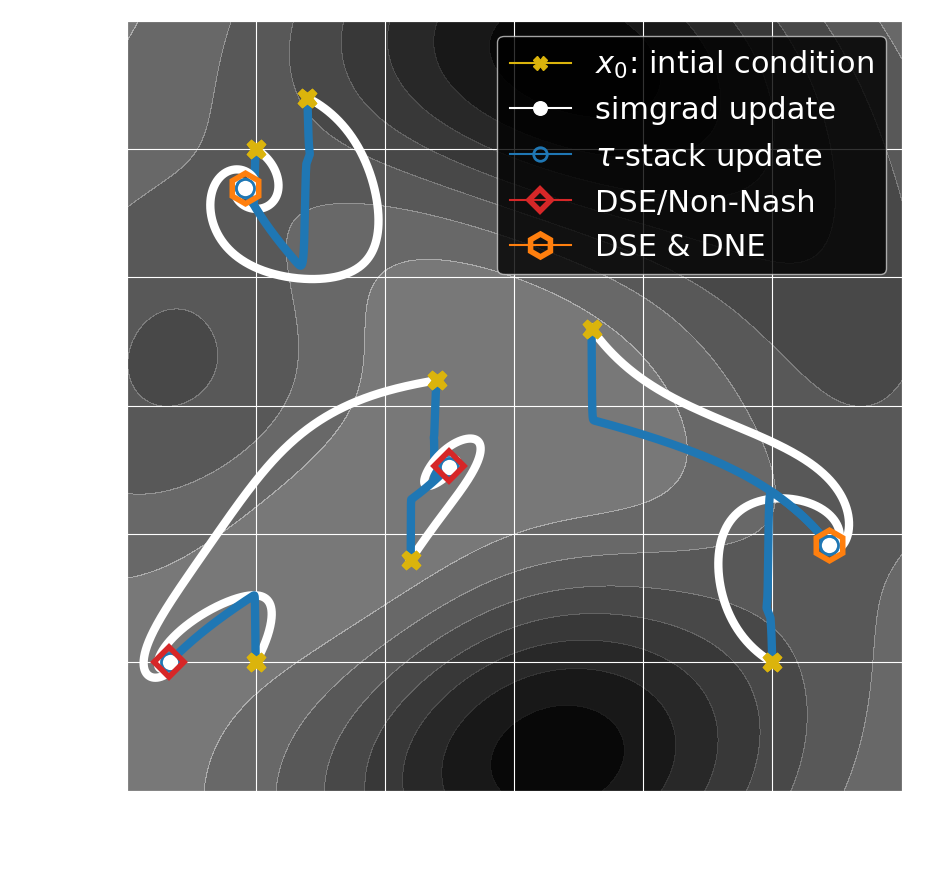

In [445]:
# Plot
tab20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tab20)):    
    r, g, b = tab20[i]    
    tab20[i] = (r / 255., g / 255., b / 255.) 
mpl.rcParams.update(mpl.rcParamsDefault)
lw=3; ms=10
plt.figure(figsize=(10,10))

N=100000
B=30
cmapp_r=reverse_colourmap(cmapp)
x, y = np.meshgrid(np.linspace(-B,B, np.sqrt(N)), np.linspace(-B,B, np.sqrt(N)))
def f1_(x1,x2):
    return -((a1*x1**2 + x2)**2 + (b1*x2**2 + x1)**2) * np.exp(-0.01*(x1**2 + x2**2))
Z=f1_(x,y)
plt.style.use('dark_background')
plt.contourf(x,y, Z,cmap=cmap_r, alpha=0.5) #'RdGy'
#cb=plt.colorbar(pad=0.01);
#cb.outline.set_visible(False)
#cb.ax.tick_params(labelsize=15) 
#cb.set_ticks([])




i=0
for x,y in zip(x_sgrad, x_stack): #x_stack): #,x_lola, x_con):
    plt.plot(*x.T, '-', color='white', linewidth=lw+3)
    plt.plot(*y.T, 'tab:blue', linewidth=lw+3, markersize=ms)
    #print('lrate1 : \n', *x[-1].T)
    #plt.plot(*z.T, 'r-')
    #plt.plot(*z[-1].T,'ro')
    #print('lrate2 : \n', *z[-1].T)
    #plt.plot(*z[0].T, 'rx')
    if i==0:
        plt.plot(*x[0].T, 'xkcd:gold', marker='X', markersize=ms+3, label=r'$x_0$: intial condition')
        plt.plot(*x[-1].T, 'white', marker='o', markersize=ms+3, label=r'simgrad update')
        plt.plot(*y[-1].T, 'tab:blue', marker='o', markersize=ms+3, fillstyle='none',
             markerfacecoloralt='white', markeredgewidth=2, label=r'$\tau$-stack update')
    else:
        plt.plot(*x[0].T,  'xkcd:gold', marker='X', markersize=ms+3)
        plt.plot(*x[-1].T,'white', marker='o', markersize=ms+3)
        plt.plot(*y[-1].T, 'tab:blue', marker='o', markersize=ms+3, fillstyle='none',
             markerfacecoloralt='white', markeredgewidth=2)
    plt.plot(*y[0].T,  'xkcd:gold', marker='X', markersize=ms+3)
    
    
    i+=1
    print(y[-1])
#plt.title('Sim grad')
plt.plot(*np.array([-2.50151,-2.33986]).T, 'tab:red', marker='D', markersize=13+2, label='DSE/Non-Nash',fillstyle='none', markeredgewidth=4)
plt.plot(*np.array([-13.3392,-9.9917]).T, 'tab:red', marker='D', markersize=13+2,fillstyle='none', markeredgewidth=4) 
#, label='Stackelberg/Non-Nash')


plt.plot(*np.array([12.1886,-5.42317]).T, 'tab:orange', marker='h', 
         markersize=18+4, label=r'DSE & DNE',fillstyle='none', markeredgewidth=4)
plt.plot(*np.array([-10.4166,8.48055]).T, 'tab:orange', marker='h',markersize=18+4,fillstyle='none', markeredgewidth=4)
xlim=15; ylim=15
plt.xlim([-xlim, xlim])
plt.ylim([-ylim,ylim])
plt.tick_params(labelsize=22)
plt.xlabel(r"$x_1$ (player 1's action)", fontsize=24)
plt.ylabel(r"$x_2$ (player 2's action)", fontsize=24)
plt.legend(bbox_to_anchor=(1,1),markerscale=0.75, fontsize=22)
plt.grid()

plt.savefig('polynomialzerosum_contour_lily.pdf', bbox_inches='tight')

[12.18836395 -5.42288673]
[-2.52200438 -2.36222631]
[-10.41662329   8.48054885]
[12.18857086 -5.4231614 ]
[-13.29022984  -9.94092253]
[-2.57573903 -2.42003383]


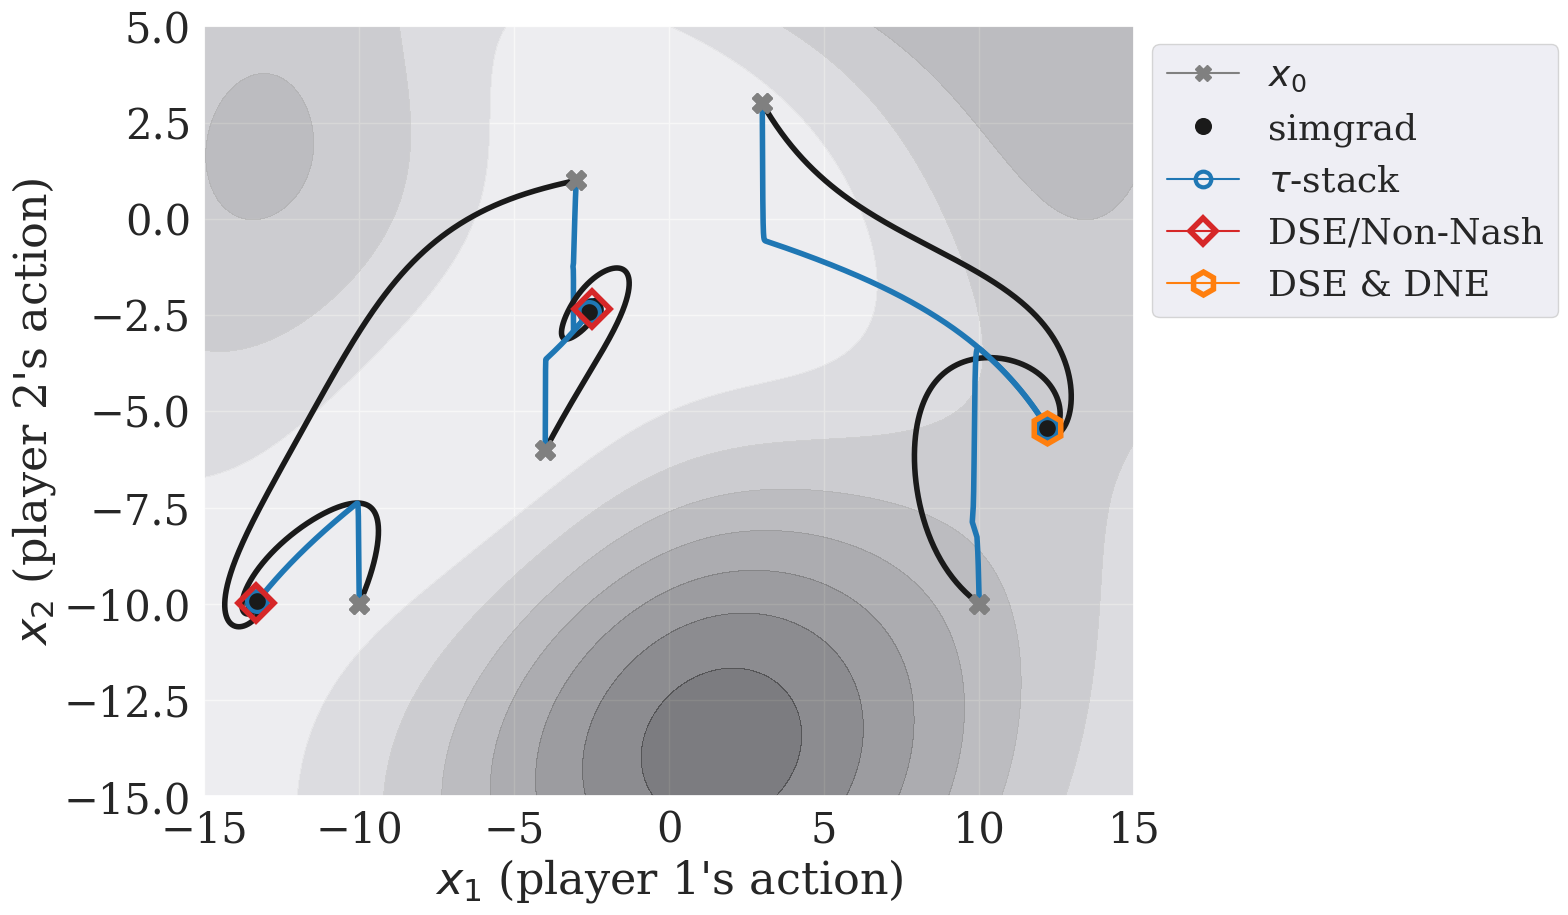

In [376]:
# Plot
mpl.rcParams.update(mpl.rcParamsDefault)
from matplotlib import rc
import seaborn as sns
#sns.set(style="darkgrid")
from seaborn import xkcd_rgb as xkcd
sns.set()

cols=[xkcd['sea blue'], xkcd['red'], xkcd['orange'], xkcd['green']]
#sns.set_style("whitegrid", 
#              {'font.family':['serif'],
#               'font.serif':['Times New Roman']})
#sns.set(rc={'text.usetex' : True}, font_scale=1.0)
#sns.set(rc={'text.usetex' : True}, font_scale=1.0)
sns.set_style("darkgrid",
                {'font.family':['serif'],
                 'font.serif':['Times New Roman']})
#sns.set_style("whitegrid")
lw=4; ms=15
fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(111,aspect='equal')
fig.clf()
N=100000
B=30
cmapp_r=reverse_colourmap(cmapp)
x, y = np.meshgrid(np.linspace(-B,B, np.sqrt(N)), np.linspace(-B,B, np.sqrt(N)))
def f1_(x1,x2):
    return -((a1*x1**2 + x2)**2 + (b1*x2**2 + x1)**2) * np.exp(-0.01*(x1**2 + x2**2))
Z=f1_(x,y)
plt.contourf(x,y, Z,cmap=cmap_r, alpha=0.5) #'RdGy'



i=0
for x,y in zip(x_sgrad, x_stack): 
    plt.plot(*x.T, 'k-', linewidth=lw)
    plt.plot(*y.T, 'tab:blue', linewidth=lw, markersize=ms)
    if i==0:
        plt.plot(*x[0].T, 'grey', marker='X', markersize=ms, label=r'$x_0$')
        plt.plot(*x[-1].T,'ko', markersize=ms, label=r'simgrad')
        plt.plot(*y[-1].T, 'tab:blue', marker='o', markersize=ms, fillstyle='none',
             markerfacecoloralt='white', markeredgewidth=3, label=r'$\tau$-stack')
    else:
        plt.plot(*x[0].T, 'grey', marker='X', markersize=ms)
        plt.plot(*x[-1].T,'ko', markersize=ms)
        plt.plot(*y[-1].T, 'tab:blue', marker='o', markersize=ms, fillstyle='none',
             markerfacecoloralt='white', markeredgewidth=3)
    plt.plot(*y[0].T, 'grey', marker='X', markersize=ms)
    
    
    i+=1
    print(y[-1])
    
plt.plot(*np.array([-2.50151,-2.35]).T, 'tab:red', marker='D', markersize=18, label='DSE/Non-Nash', fillstyle='none', markeredgewidth=4)
plt.plot(*np.array([-13.3392,-9.9917]).T, 'tab:red', marker='D', markersize=18, fillstyle='none', markeredgewidth=4) 
#, label='Stackelberg/Non-Nash')


plt.plot(*np.array([12.1886,-5.42317]).T, 'tab:orange', marker='h', 
         markersize=22, label=r'DSE & DNE', fillstyle='none', markeredgewidth=4)
plt.plot(*np.array([-10.4166,8.48055]).T, 'tab:orange', marker='h',markersize=22, fillstyle='none', markeredgewidth=3)

#plt.title('Sim grad')
xlim=15; ylim=15; fs1=32
plt.xlim([-xlim, xlim])
plt.ylim([-ylim,5])
ax.set_aspect('equal')
plt.tick_params(labelsize=30)
plt.xlabel(r"$x_1$ (player 1's action)", fontsize=fs1)
plt.ylabel(r"$x_2$ (player 2's action)", fontsize=fs1)
plt.legend(bbox_to_anchor=(1,1),markerscale=0.75, fontsize=26)
#plt.grid()
plt.savefig('polynomialzerosum_contour_new_v3.pdf', bbox_inches='tight')